In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [39]:
# import dataset from seaborn
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [40]:
# looks like there are no nulls in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
total             51 non-null float64
speeding          51 non-null float64
alcohol           51 non-null float64
not_distracted    51 non-null float64
no_previous       51 non-null float64
ins_premium       51 non-null float64
ins_losses        51 non-null float64
abbrev            51 non-null object
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [41]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [42]:
df.isnull().sum()

total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

In [43]:
# datatypes for each series
df.dtypes

total             float64
speeding          float64
alcohol           float64
not_distracted    float64
no_previous       float64
ins_premium       float64
ins_losses        float64
abbrev             object
dtype: object

In [44]:
# all values in abbrev are unique, 51 states
df['abbrev'].nunique()

51

In [45]:
# rename ambiguous column names
df.rename({'total':'total_crashes', 'abbrev':'state'},axis=1, inplace=True)

In [46]:
df.head()

,total_crashes,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [47]:
# encode states function
def state_encoded(df):
    df[['state_encoded']] = df[['state']].apply(LabelEncoder().fit_transform)
    return df

In [48]:
df = state_encoded(df)

In [49]:
df.head()

,total_crashes,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,state_encoded
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,1
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,0
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,3
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,2
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,4


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


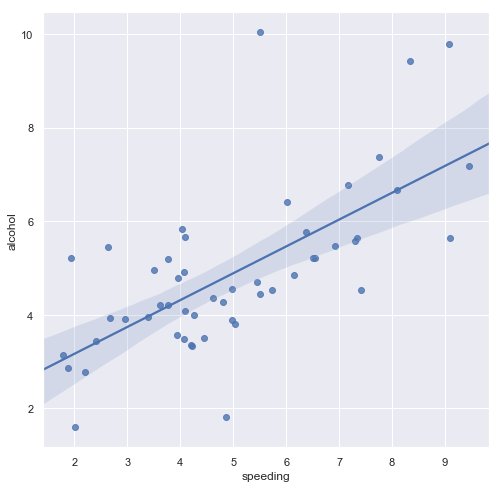

In [50]:
# positive relationship between speeding and alcohol.
sns.regplot(x="speeding", y="alcohol", data=df)

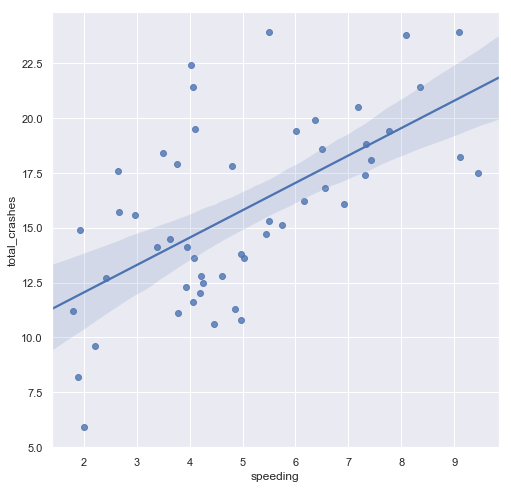

In [51]:
# positive relationship between speeding and total crashes
sns.regplot(x="speeding", y="total_crashes", data=df)

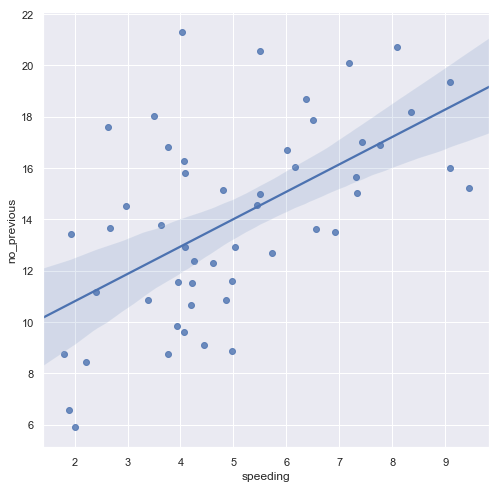

In [52]:
# positive relationship between speeding and no previous
sns.regplot(x="speeding", y="no_previous", data=df)

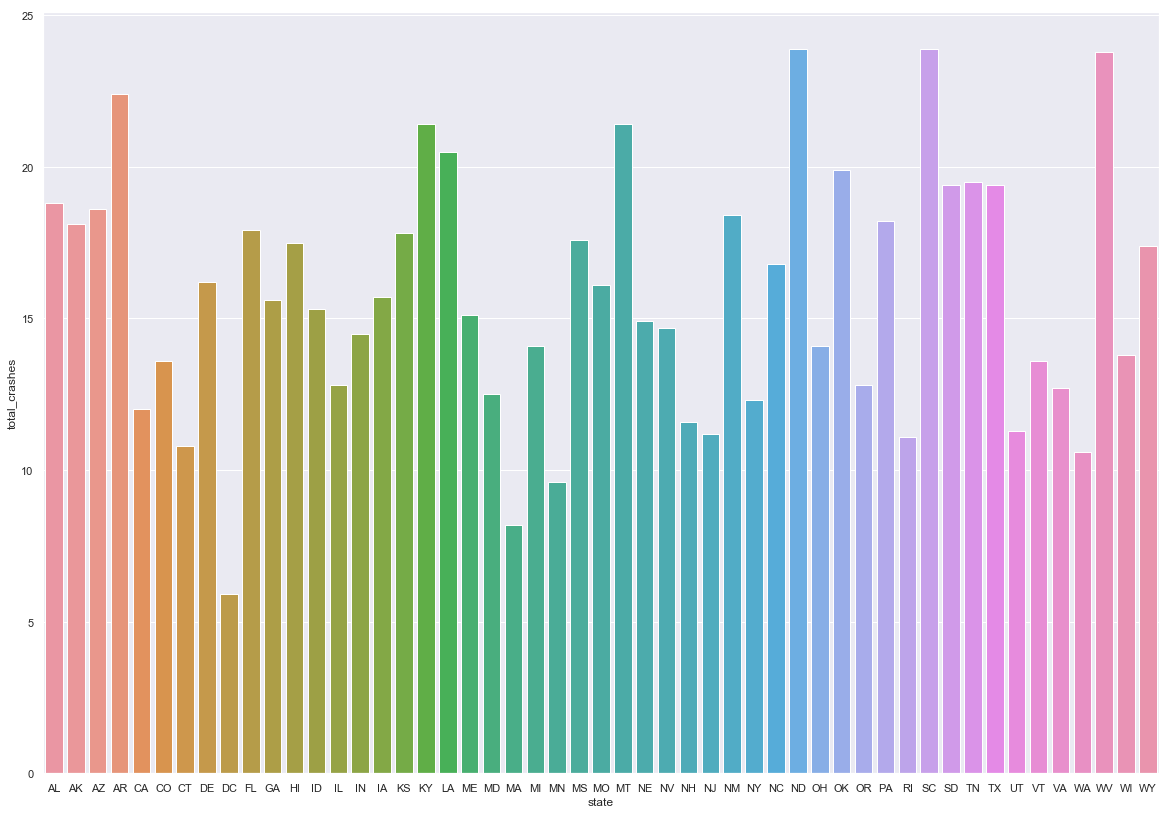

In [70]:
# Looks like the most states with the most crashes are WV, SC, and ND
sns.barplot(x="state", y="total_crashes", data=df)
sns.set(rc={'figure.figsize':(20,14)})

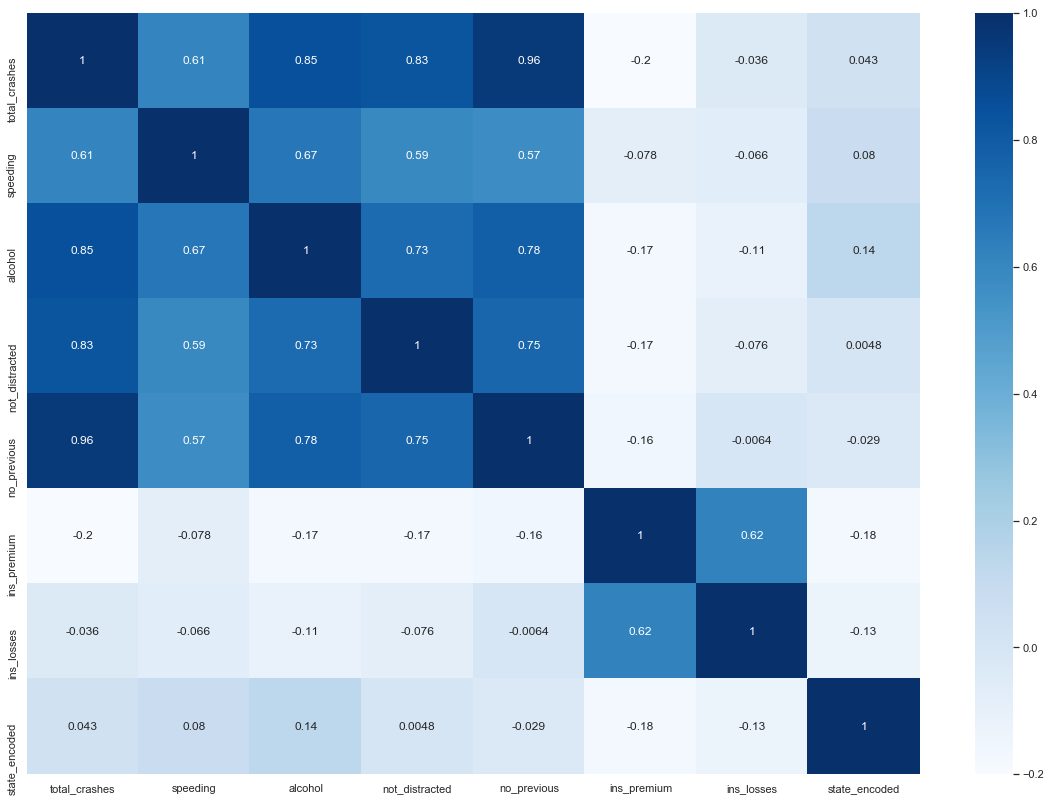

In [54]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
sns.set(rc={'figure.figsize':(8,8)})

# Modeling

## Linear Regression

In [55]:
# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [56]:
df.head()

,total_crashes,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,state_encoded
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,1
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,0
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,3
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,2
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,4


In [57]:
X = df[['speeding','alcohol']]
y = df[['total_crashes']]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.80, random_state=123)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [58]:
lm1 = LinearRegression(fit_intercept=False)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [59]:
lm1.fit(X_train, y_train)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)


In [60]:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

0.0
[[0.53948049 2.55896428]]


In [61]:
print('Multivariate - total_crashes = b + m * speeding + m2 * yearbuilt')
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coefficients[0][0])
print('    coefficient (m2): %.2f' % lm1_coefficients[0][1])

Multivariate - total_crashes = b + m * speeding + m2 * yearbuilt
    y-intercept  (b): 0.00
    coefficient (m1): 0.54
    coefficient (m2): 2.56


In [62]:
y_pred_lm1 = lm1.predict(X_train)

In [63]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))

lm1
  mse: 8.77


In [64]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance in the total crashes can be explained by speeding and alcohol'.format(r2_lm1))

  45.29% of the variance in the total crashes can be explained by speeding and alcohol


### Make predictions using the testing set

In [65]:
y_pred_lm1 = lm1.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred_lm1)
print("Mean squared error: %.2f" % mse)

Mean squared error: 4.33


In [67]:
r2 = r2_score(y_test, y_pred_lm1)

print('{:.2%} of the variance in the total crashes can be explained by speeding and alcohol.'
      .format(r2))

75.56% of the variance in the total crashes can be explained by speeding and alcohol.


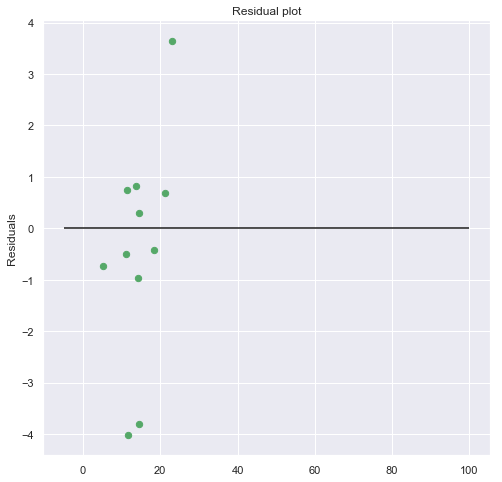

In [68]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_test, c='g', s=40)
plt.hlines(y=0, xmin=-5, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')
sns.set(rc={'figure.figsize':(5,5)})